In [2]:
%pylab inline

from library import lasagnennet as LN
from library import features as F
from library import scale as S
from library import validate as V
import numpy as np
import theano as TH
import pandas as pa
import lasagne as L

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_feats = pa.read_csv('train_feats.csv')
train_targets = pa.read_csv('train_targets.csv')
val_feats = pa.read_csv('validation_feats.csv')
val_targets = pa.read_csv('validation_targets.csv')

In [4]:
tx = np.asarray(train_feats, dtype=TH.config.floatX)
tyall = np.asarray(train_targets, dtype=TH.config.floatX)
ty = np.asarray(train_targets['LABEL'], dtype=TH.config.floatX).reshape(-1, 1)
vx = np.asarray(val_feats, dtype=TH.config.floatX)
vyall = np.asarray(val_targets, dtype=TH.config.floatX)
vy = np.asarray(val_targets['LABEL'], dtype=TH.config.floatX).reshape(-1, 1)

In [6]:
print tx.shape

(480838, 129)


In [7]:
idtimes = [0 for i in xrange(3595)]
for i in vyall:
    idtimes[np.int32(i[0])] = max(idtimes[np.int32(i[0])], i[1])

In [8]:
ty = ty.ravel()
vy = vy.ravel()

In [9]:
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc_score

In [95]:
clf = svm.SVC(verbose=True, max_iter=200, class_weight={0:1, 1:1.5})
clf.fit(tx, ty)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 1.5}, coef0=0.0, degree=3,
  gamma=0.0, kernel='rbf', max_iter=200, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=True)

In [96]:
tprobs = clf.decision_function(tx)
vprobs = clf.decision_function(vx)

0.666030956279


/home/biswajit/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function auc_score is deprecated; Function 'auc_score' has been renamed to 'roc_auc_score' and will be removed in release 0.16.
  warnings.warn(msg, category=DeprecationWarning)


0.723290255789


/home/biswajit/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function auc_score is deprecated; Function 'auc_score' has been renamed to 'roc_auc_score' and will be removed in release 0.16.
  warnings.warn(msg, category=DeprecationWarning)


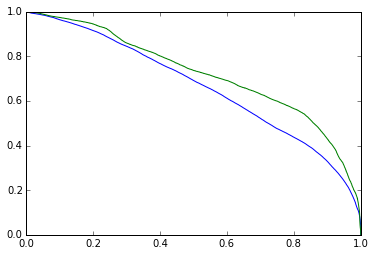

In [97]:
yscore = tprobs.ravel()
fpr, tpr, thresh = roc_curve(ty, yscore)
auc = auc_score(ty, yscore)
print auc
display(pyplot.plot(1-fpr, tpr,))

yscore = vprobs.ravel()
fpr, tpr, thresh = roc_curve(vy, yscore)
auc = auc_score(vy, yscore)
print auc
display(pyplot.plot(1-fpr, tpr,))

In [100]:
thresh = np.percentile(vprobs.ravel(), 99)
pred = np.int32(vprobs.ravel() >= thresh)
print np.sum(pred)

1476


In [101]:
output = vyall.swapaxes(0,1)
output[2] = pred
output = output.swapaxes(0,1)

In [102]:
outfile = open('out.csv', 'w')
outfile.write('ID,TIME,LABEL,ICU\n')
for i in output:
    if i[3] == 1:
        outfile.write(','.join([str(int(j)) for j in i])+'\n')
outfile.close()

In [103]:
reload(V)
V.validate('out.csv', './Training_Dataset/id_label_train.csv')

tp :  8 , tn :  841 , fp :  8 , fn :  49
sensitivity :  0.140350877193 , specificity :  0.990577149588
accuracy :  0.937086092715 median prediction time :  165.631111111
finalScore :  30.8148905833


(0.14035087719298245,
 0.9905771495877503,
 0.9370860927152318,
 165.63111111111112,
 30.81489058334886)